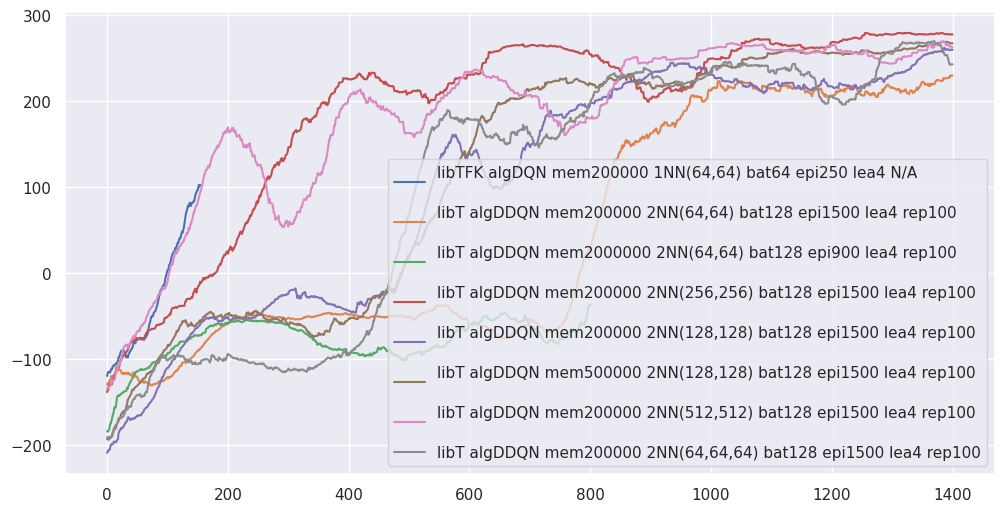

In [72]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Setting seaborn style
sns.set()

def ma(x, w):
    """Rolling average"""
    return np.convolve(x, np.ones(w), 'valid') / w

# List of models to plot (descriptions are in descriptions.txt)
models = {}

d = []
with open('descriptions.txt') as f:
    for l in f.readlines():
        m = l.split(';')[0]
        d = l.split(';')[1]
        dd = d.split(' ')
        models[m]={}
        models[m]['desc'] = d
        models[m]['desclong']={}
        models[m]['desclong']['ML Library'] = dd[0]
        models[m]['desclong']['Algorithm'] = dd[1]
        models[m]['desclong']['Transitions stored'] = dd[2]
        models[m]['desclong']['Q network(s)'] = dd[3]
        models[m]['desclong']['Batch size'] = dd[4]
        models[m]['desclong']['Episodes'] = dd[5]
        models[m]['desclong']['Update weights'] = dd[6]
        models[m]['desclong']['Replace target Q weights'] = dd[7]
        
        

for k in models.keys():
    with open('{}score.json'.format(k)) as f:
        models[k]['score'] = json.load(f)
    if os.path.exists('{}eps.json'.format(k)) :
        with open('{}eps.json'.format(k)) as f:
            models[k]['eps'] = json.load(f)


plt.figure(figsize=(12, 6))
for k in models.keys():
    plt.plot([x for x in range(len(ma(models[k]['score'], 100)))], 
             ma(models[k]['score'], 100), 
             label=models[k]['desc'])

# Adding a legend to the plot
plt.legend()
plt.show()

#### Visualize each experiment individually

Experiment m0:
	ML Library: TFK
	Algorithm: DQN
	Transitions stored: 200000
	Q network(s): (64,64)
	Batch size: 64
	Episodes: 250
	Update weights: 4
	Replace target Q weights: 

	Broke 200 point barrier: N/A


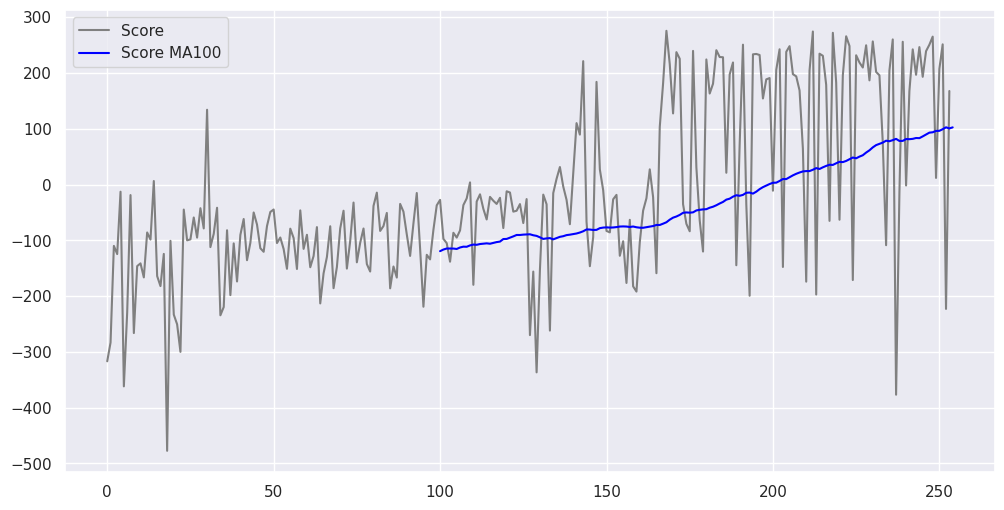

Experiment m1:
	ML Library: T
	Algorithm: DDQN
	Transitions stored: 200000
	Q network(s): (64,64)
	Batch size: 128
	Episodes: 1500
	Update weights: 4
	Replace target Q weights: 100

	Broke 200 point barrier: step 967


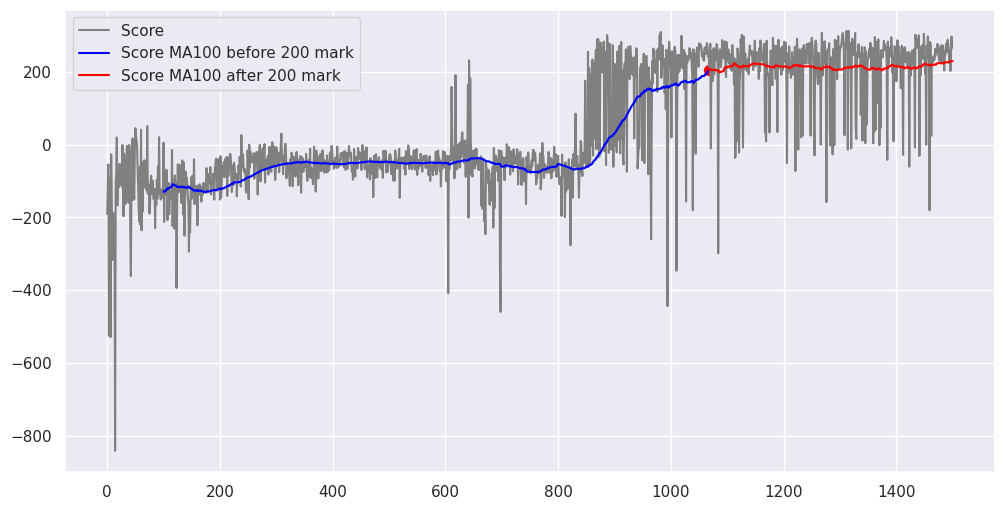

Experiment m2:
	ML Library: T
	Algorithm: DDQN
	Transitions stored: 2000000
	Q network(s): (64,64)
	Batch size: 128
	Episodes: 900
	Update weights: 4
	Replace target Q weights: 100

	Broke 200 point barrier: N/A


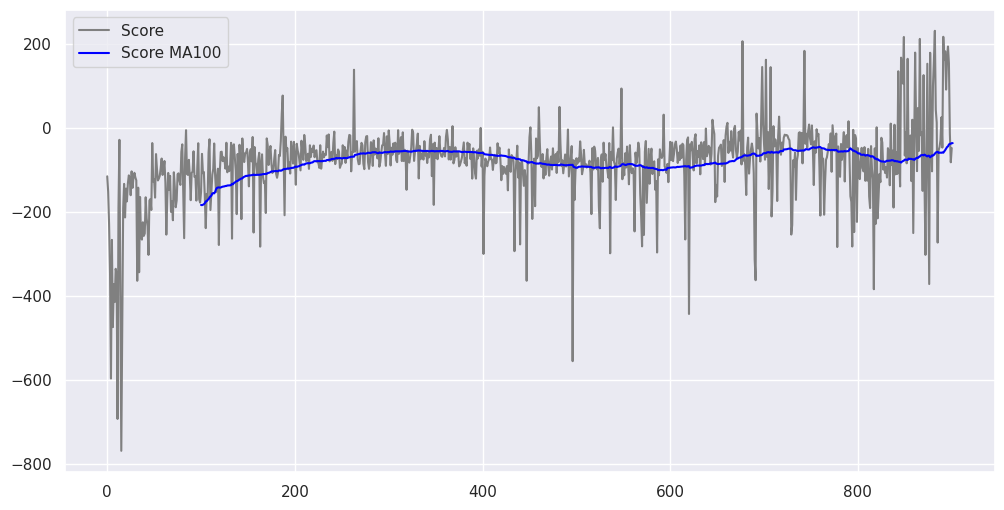

Experiment m3:
	ML Library: T
	Algorithm: DDQN
	Transitions stored: 200000
	Q network(s): (256,256)
	Batch size: 128
	Episodes: 1500
	Update weights: 4
	Replace target Q weights: 100

	Broke 200 point barrier: step 369


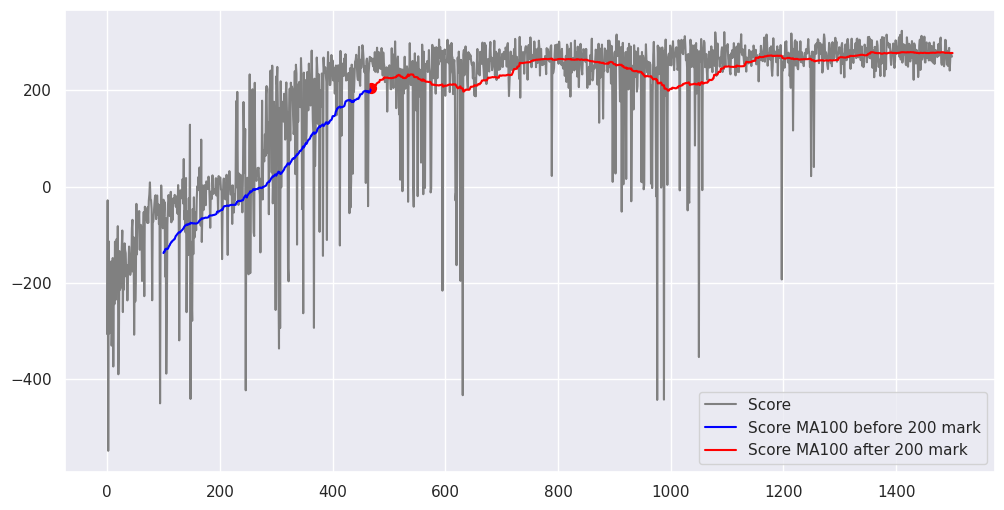

Experiment m4:
	ML Library: T
	Algorithm: DDQN
	Transitions stored: 200000
	Q network(s): (128,128)
	Batch size: 128
	Episodes: 1500
	Update weights: 4
	Replace target Q weights: 100

	Broke 200 point barrier: step 809


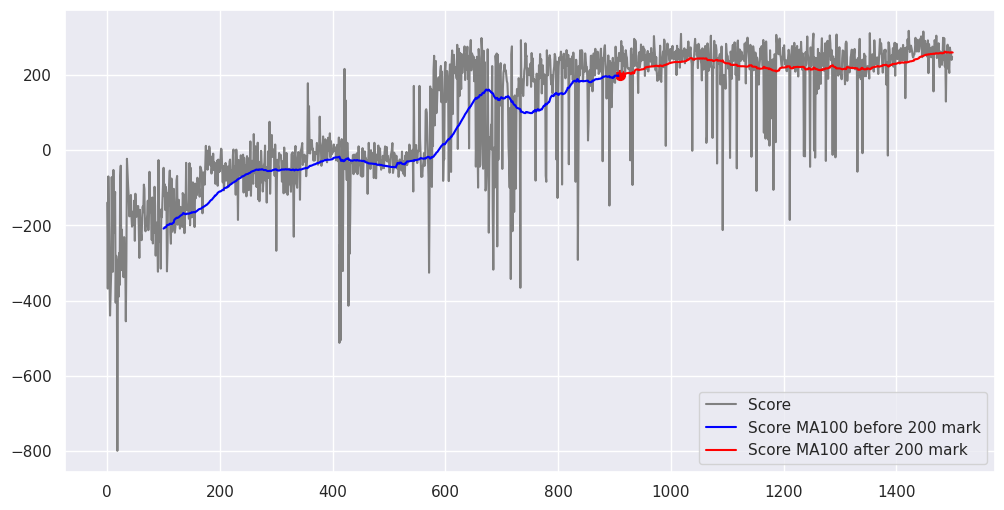

Experiment m5:
	ML Library: T
	Algorithm: DDQN
	Transitions stored: 500000
	Q network(s): (128,128)
	Batch size: 128
	Episodes: 1500
	Update weights: 4
	Replace target Q weights: 100

	Broke 200 point barrier: step 663


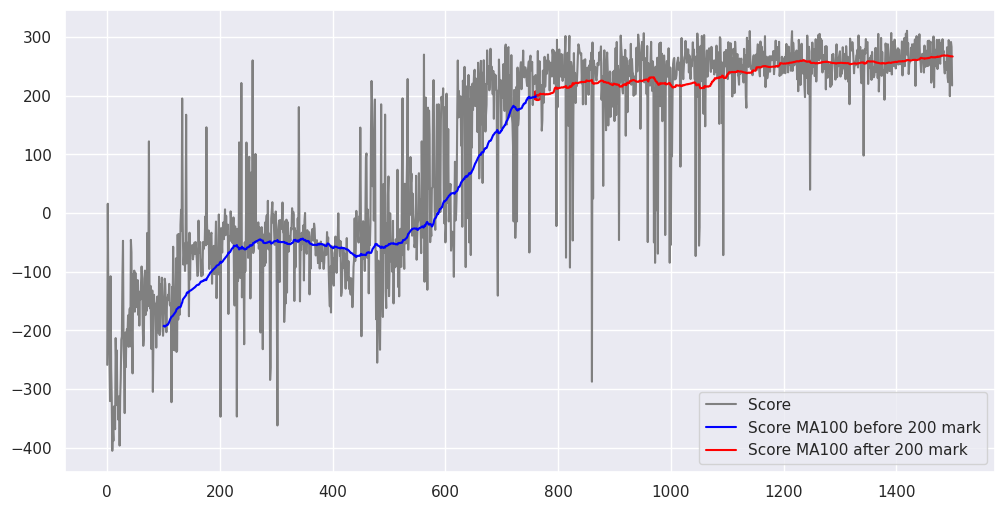

Experiment m6:
	ML Library: T
	Algorithm: DDQN
	Transitions stored: 200000
	Q network(s): (512,512)
	Batch size: 128
	Episodes: 1500
	Update weights: 4
	Replace target Q weights: 100

	Broke 200 point barrier: step 400


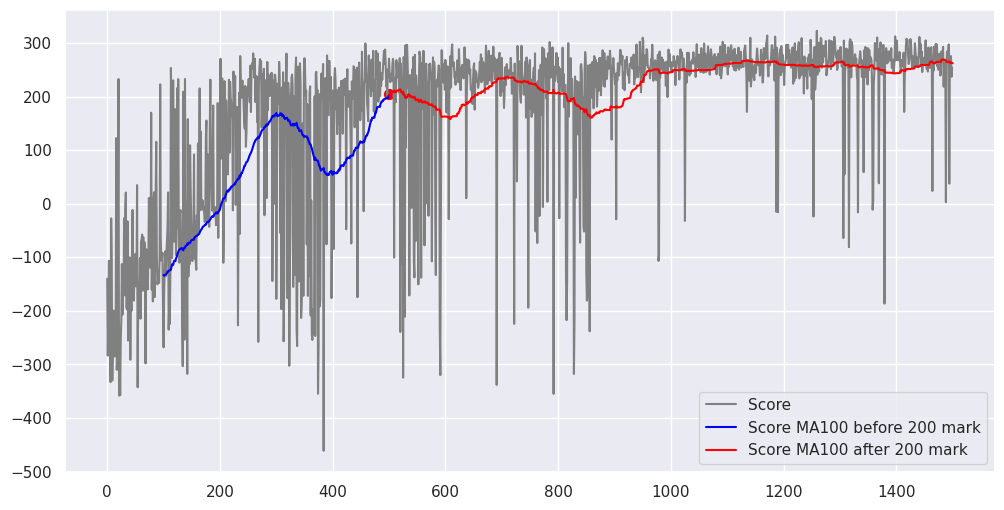

Experiment m7:
	ML Library: T
	Algorithm: DDQN
	Transitions stored: 200000
	Q network(s): (64,64,64)
	Batch size: 128
	Episodes: 1500
	Update weights: 4
	Replace target Q weights: 100
	Broke 200 point barrier: step 802


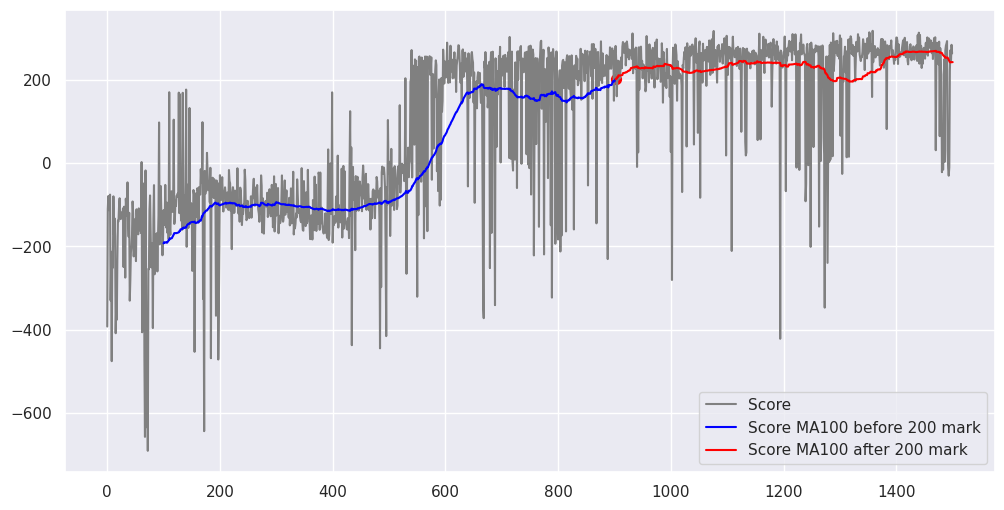

In [73]:
def break200point(scores, x):
    i = 0
    for s in scores:
        if s >= x:
            return i+1
        i += 1
    #return next(x[0] for x in enumerate(scores) if x[1] >= 200.0)
    
for k in models.keys():
    plt.figure(figsize=(12, 6))
    print('Experiment {}:'.format(k))
    for dk,v in models[k]['desclong'].items():
        print('\t{}: {}'.format(dk, v[3:]))
    point200 = break200point(ma(models[k]['score'], 100), 200.0)
    point200str = 'step {}'.format(point200) if point200 else 'N/A'
    print('\tBroke 200 point barrier: {}'.format(point200str))
        
    if point200:
        y = ma(models[k]['score'], 100)[point200]
        plt.scatter(point200+100, y, color='red', marker='o', s=50)
        
    plt.plot([x for x in range(len(models[k]['score']))], 
             models[k]['score'], 
             color='gray',
             label='Score')
    
    yavg = ma(models[k]['score'], 100)
    xavg = [x+100 for x in range(len(yavg))]
    # Plotting the first segment in blue
    if point200:
        plt.plot(xavg[:point200], yavg[:point200], color='blue', label='Score MA100 before 200 mark')

        # Plotting the second segment in red
        plt.plot(xavg[point200:], yavg[point200:], color='red', label='Score MA100 after 200 mark')
    else:
        plt.plot(xavg, 
                 ma(models[k]['score'], 100), 
                 color='blue',
                 label='Score MA100')
    
    
        

    # Adding a legend to the plot
    plt.legend()
    plt.show()

In [ ]:
# Thank you Chanseok: 
# https://goodboychan.github.io/python/reinforcement_learning/pytorch/udacity/2021/05/07/DQN-LunarLander.html#Define-Replay-Buffer
import gymnasium as gym
from ddqn_torch import DoubleQAgent
from gymnasium.wrappers.monitoring import video_recorder

def show_video(model_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(model_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")
        
def generate_video_of_model(model_name, env_name):
    env = gym.make(env_name)
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(model_name))
    agent = DoubleQAgent(epsilon=0.0)
    agent.load_saved_model(model_name)
    state = env.reset()[0]
    done = False
    while not done:
        frame = env.render()
        vid.capture_frame()
        action = agent.choose_action(state)
        new_state, _, _, _, _ = env.step(action)
        state = new_state
        
generate_video_of_model('stats/m3.h5', "LunarLander-v2")